# Metropolis algorithm and correlation

We will use the Metropolis algorithm with a proposal $x^{\prime}\in(x-\delta,x+\delta)$ with $\delta=0.1$ to generate random numbers $\{x_{i}\}_{i=1,...,M}$ distributed according a Gaussian distribution of mean 0 and variance 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
%config InlineBackend.figure_format='retina'

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

To generate the random seeris $\{x_{i}\}_{i=1,...,M}$​ , distributed as Gaussian with $\mu=0$​ and $\sigma=1$​​, we used the acceptance prabability for Metropolis algorithm as,
$$
h(x|y)=min(1,q(x|y)),
$$
With the use of detailed balanced condition that implies,
$$
q(x|y)=\frac{g(y|x)f_{\hat{x}}(x)}{g(x|y)f_{\hat{x}}(y)},
$$


Sine $g(x|y)=g(y|x)=1,\quad f_{\hat{x}}(x)=\frac{1}{\sqrt{2\pi}}e^{-x^{2}/2},$

we get,
$$
q(x|y)=e^{-(x^{2}-y^{2})/2}.
$$

In [3]:
def metro(n):
 fx=[]
 x=0
 for i in range(n):
   y=np.random.uniform(x-0.1,x+0.1)
   q=np.exp(-(y**2-x**2)/2)
   ny=np.random.uniform()
   if ny<min(1,q):
     fx.append(x)
     x=y    
 return fx

In [4]:
n=10**6
fx=metro(n)

The distribution can now be generated for $M=10^{6}$ as shown below.

In [5]:
print(f'Mean = {np.around(np.mean(fx),3)}, std = {np.around(np.std(fx),3)}')

Mean = -0.025, std = 0.989


Text(0, 0.5, 'PDF')

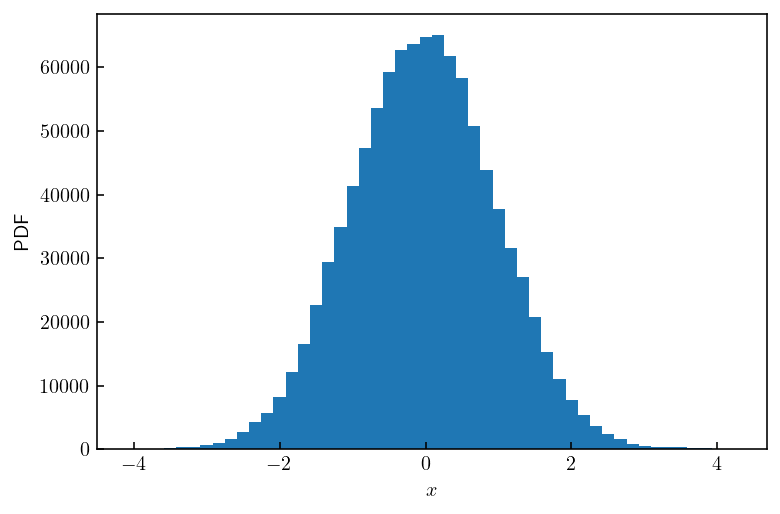

In [6]:
plt.hist(fx,bins=50)
plt.xlabel("$x$")
plt.ylabel("PDF")

In [7]:
sx=np.array(fx)**2

## Autocorrelation

Now we will take the function $G(x)=x^{2}$ and generate a long series of values ${G(x_{i})}_{i=1,...,M}$ to compute and plot the correlation function $\rho_{G}(k)$. We will also compute the correlation time $\tau_{G}=\sum_{k=1}\rho_{G}(k)$ and compare it with the value obtained using the exponential approach to the correlation function $\tau_{G}\approx\rho_{G}(1)/[1-\rho_{G}(1)]$.

In [16]:
sxacf=acf(sx,fft=True,nlags=10000)
sxacft=acf(sx,fft=True,nlags=2000)
print(f'Corr. time = {np.around(np.sum(np.abs(sxacft)),3)}')

Corr. time = 293.003


In [17]:
print(f'Approx corr time = {np.around(sxacf[1]/(1-sxacf[1]),3)}')

Approx corr time = 301.4


In [18]:
sxtime=np.linspace(0,len(sxacf),len(sxacf),len(sxacf))

Text(0, 0.5, 'Autocorrelation')

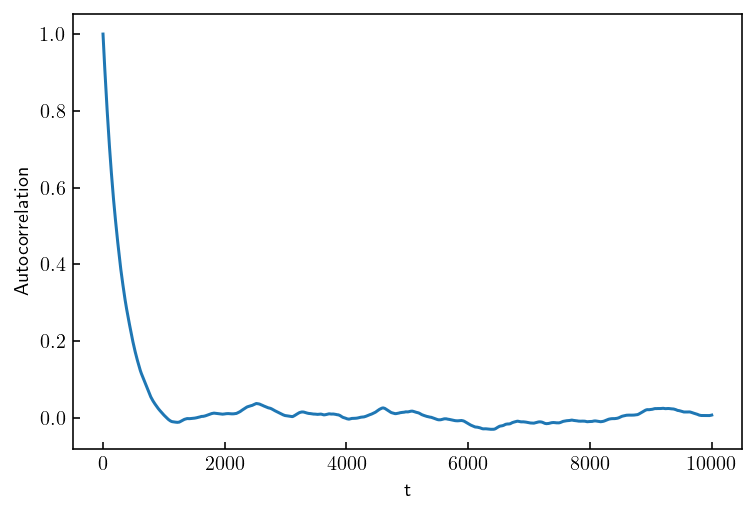

In [19]:
plt.plot(sxtime[:10**4*3],sxacf[:10**4*3])
plt.xlabel('t')
plt.ylabel('Autocorrelation')

As a bonus we can also compute the integral,

$$
I = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}dxx^{2}e^{-x^{2}/2}.
$$

In [22]:
valsx=np.mean(sx)
errsx=np.std(sx)*np.sqrt((2*sxacf[1]+1)/10**6)
print(f'I = {np.around(valsx,3)}, Std = {np.around(errsx,3)}, Exact value = 1')

I = 0.979, Std = 0.002, Exact value = 1


***